In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [8]:
#Generate a dataset with missing values
np.random.seed(0)
data={
    'Age':[23,45,np.nan,35,62,np.nan,41,29,33,50],
    'income':[50000,60000,55000, np.nan, 65000,62000,np.nan,58000,59000,61000],
    'Education_Level':['Bachelor','Master',np.nan,'PhD','Bachelor','Master', 'PhD', np.nan,'Bachelor','Master'],'Purchased':[1,0,1,0,1,1,0,1,0,1]
}
df=pd.DataFrame(data)
print("Dataset with missing values")
print(df)

Dataset with missing values
    Age   income Education_Level  Purchased
0  23.0  50000.0        Bachelor          1
1  45.0  60000.0          Master          0
2   NaN  55000.0             NaN          1
3  35.0      NaN             PhD          0
4  62.0  65000.0        Bachelor          1
5   NaN  62000.0          Master          1
6  41.0      NaN             PhD          0
7  29.0  58000.0             NaN          1
8  33.0  59000.0        Bachelor          0
9  50.0  61000.0          Master          1


In [10]:
df.isnull().sum #loading and identifying columns containing missing data
df.isnull().mean #number of missing entries 



<bound method DataFrame.mean of      Age  income  Education_Level  Purchased
0  False   False            False      False
1  False   False            False      False
2   True   False             True      False
3  False    True            False      False
4  False   False            False      False
5   True   False            False      False
6  False    True            False      False
7  False   False             True      False
8  False   False            False      False
9  False   False            False      False>

In [18]:
mean=df["Age"].mean()#find the mean of the missing value
df["Age"].fillna(mean,inplace=True)# replacing it
df.isnull().sum()

mean=df["income"].mean()#find the mean of the missing value
df["income"].fillna(mean,inplace=True)# replacing it
df.isnull().sum()
#why we use mean-> Simplicity: The mean is easy to calculate and apply across a column. No complex modeling is required.


#df['column_name'].fillna('Unknown', inplace=True)#replacing a misssing strings 


C:\Users\LabStudent\AppData\Local\Temp\ipykernel_14892\1287167092.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(mean,inplace=True)# replacing it
C:\Users\LabStudent\AppData\Local\Temp\ipykernel_14892\1287167092.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

Age                0
income             0
Education_Level    2
Purchased          0
dtype: int64

In [19]:
x = df[['income']]  # selecting independent variables #predictor 
y = df[['Purchased']] #dependent # target
model = LinearRegression()
model.fit(x, y)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)



Intercept: [1.19745763]
Coefficients: [[-1.01694915e-05]]


In [20]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.4, random_state=42)
print("Train",x_train)
print("Test:",x_test)

Train     income
7  58000.0
2  55000.0
9  61000.0
4  65000.0
3  58750.0
6  58750.0
Test:     income
8  59000.0
1  60000.0
5  62000.0
0  50000.0


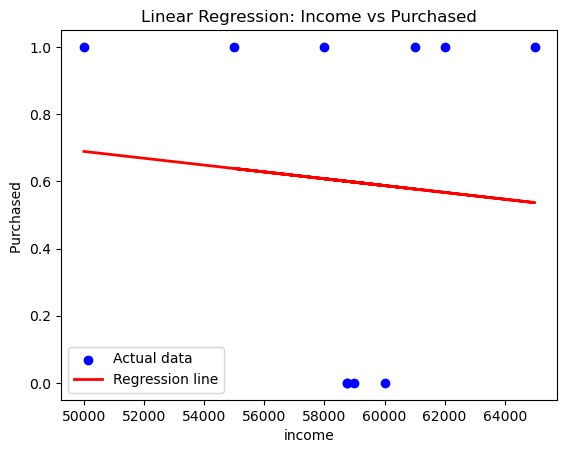

In [21]:
y_pred = model.predict(x)
plt.scatter(x, y, color='blue', label='Actual data') 
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel("income") 
plt.ylabel("Purchased ") 
plt.title("Linear Regression: Income vs Purchased") 
plt.legend() 
plt.show()

In [22]:


# Predict on test data
y_pred = model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.24653188738868143
R-squared (R²): 0.013872450445274298
